In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.dpi'] = 300

In [63]:
mpg=sns.load_dataset('mpg')

In [64]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [65]:
target=mpg['mpg']

In [66]:
target.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [67]:
features=mpg[['horsepower','weight','displacement']]

In [68]:
features

,horsepower,weight,displacement
0,130.0,3504,307.0
1,165.0,3693,350.0
2,150.0,3436,318.0
3,150.0,3433,304.0
4,140.0,3449,302.0
...,...,...,...
393,86.0,2790,140.0
394,52.0,2130,97.0
395,84.0,2295,135.0
396,79.0,2625,120.0


In [69]:
print(type(features))

<class 'pandas.core.frame.DataFrame'>


In [72]:
features = pd.DataFrame(features)

In [73]:
print(type(features))

<class 'pandas.core.frame.DataFrame'>


In [74]:
target

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

horsepower Corr Coeff:   nan 


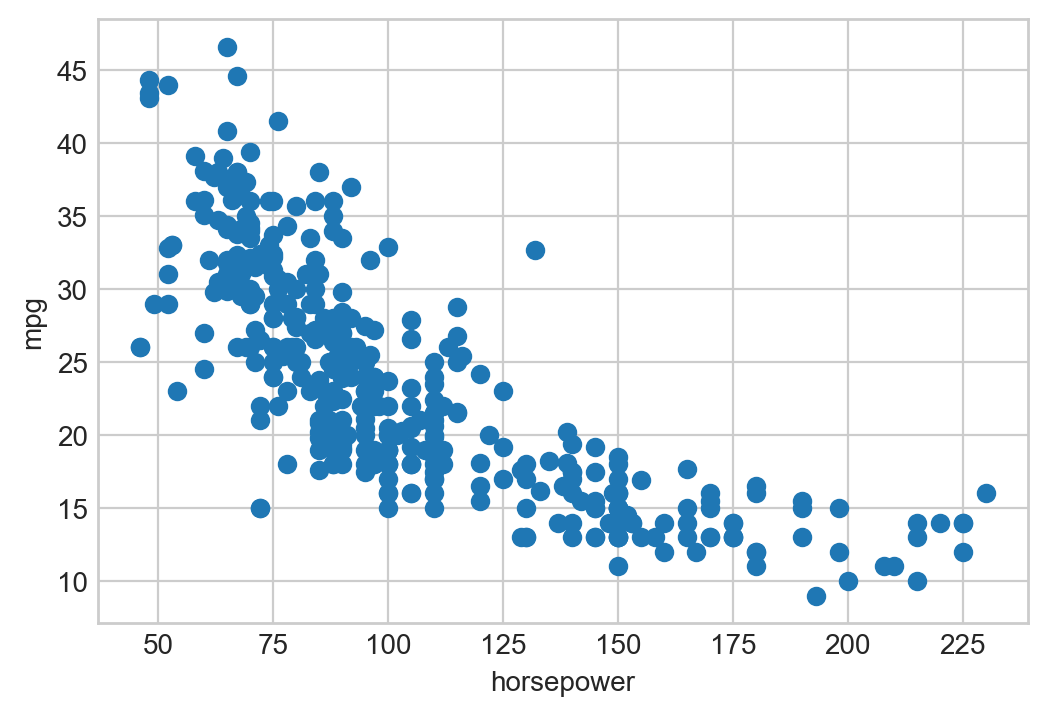

    weight Corr Coeff: -0.83 


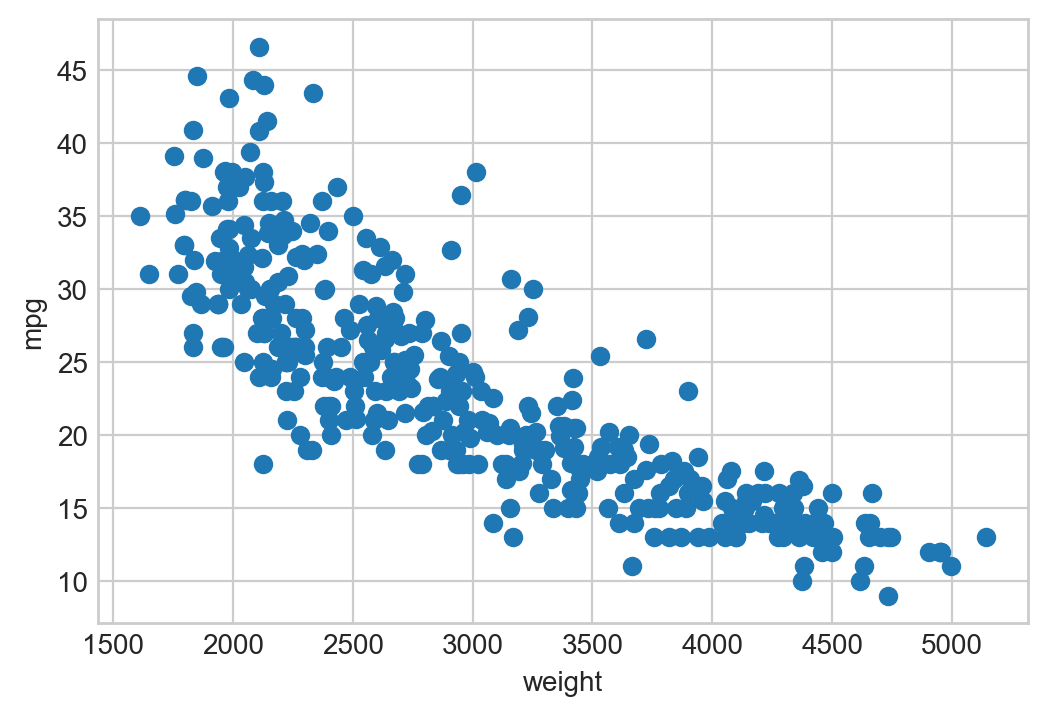

displacement Corr Coeff: -0.80 


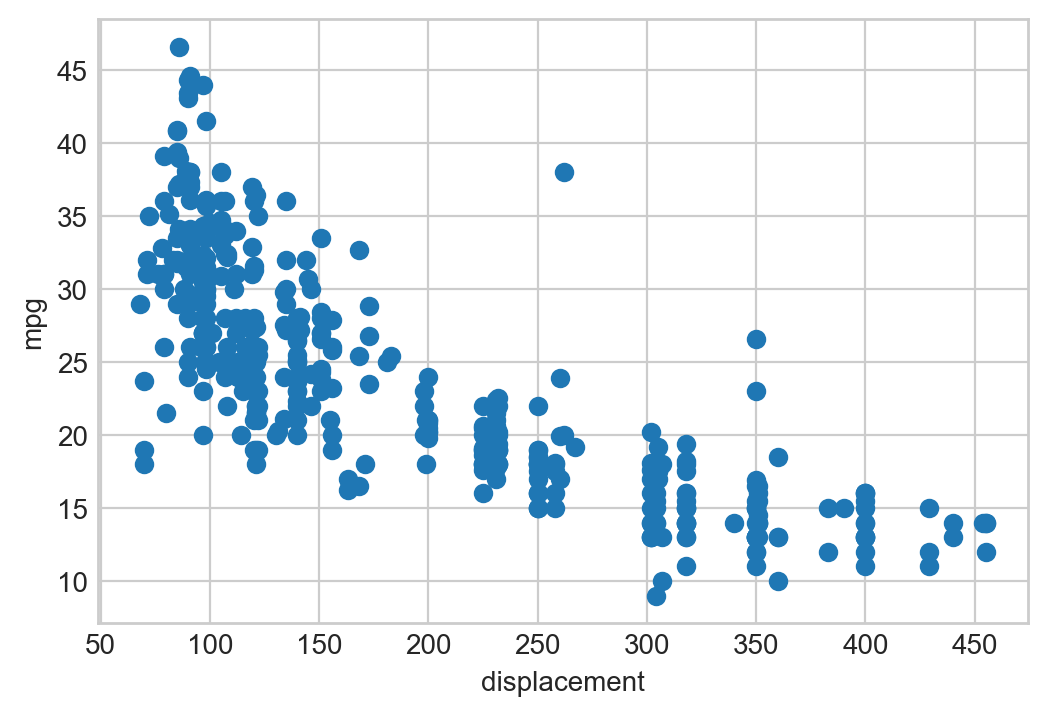

In [75]:
for col in features.columns:
    print(f"{col:>10} Corr Coeff: {np.corrcoef(features[col], target)[0][1]:>5.2f} ")
    plt.figure(dpi=200)
    plt.scatter(features[col], target)
    plt.xlabel(col)
    plt.ylabel('mpg')
    plt.show()

In [76]:
features.isna().sum()

horsepower      6
weight          0
displacement    0
dtype: int64

In [79]:
features['horsepower'].replace(np.nan, 0)

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, Length: 398, dtype: float64

In [94]:
features.fillna(0,inplace=True)

In [95]:
features.isna().sum()


horsepower      0
weight          0
displacement    0
dtype: int64

## Step 2

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2)

In [98]:
features.shape

(398, 3)

In [99]:
X_train.shape

(318, 3)

In [100]:
X_test.shape

(80, 3)

In [101]:
X_train.head()

,horsepower,weight,displacement
142,67.0,1963,79.0
209,88.0,3270,120.0
357,100.0,2615,119.0
387,85.0,3015,262.0
22,95.0,2375,104.0


In [140]:
y_train.head()

142    26.0
209    19.0
357    32.9
387    38.0
22     25.0
Name: mpg, dtype: float64

In [102]:
X_test.head()

,horsepower,weight,displacement
229,180.0,4220,400.0
318,90.0,2711,134.0
197,70.0,1937,90.0
83,80.0,2164,98.0
168,83.0,2639,140.0


## Step 3 Model selection

In [103]:
from sklearn.linear_model import LinearRegression

In [104]:
model=LinearRegression()

## Step 4 Learning and Lifting of the model

In [105]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [106]:
features.shape

(398, 3)

In [108]:
model.coef_

array([-0.03184791, -0.00511463, -0.0101728 ])

In [109]:
model.intercept_

43.888830064604335

## Step 5 Model Evaluation
`Mean Squared Error` to check in our model

$R^2$Score Accuracy Coefficient

In [110]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [111]:
y_pred=model.predict(X_test)

In [113]:
y_pred[:5]

array([12.50335832, 25.79360762, 30.83689076, 29.2760088 , 26.32375937])

In [115]:
y_test.to_numpy()[:5]

array([16. , 29.8, 29. , 28. , 23. ])

In [116]:
mse=mean_squared_error(y_test,y_pred)

In [117]:
mse

16.717468808404092

In [119]:
print(f"MSE: {mse:.2f}")
print(f"RMSE:{np.sqrt(mse):.2f}")

MSE: 16.72
RMSE:4.09


In [120]:
acc=r2_score(y_test,y_pred)

In [121]:
print(f"Accuracy:{acc*100:.2f}")

Accuracy:74.00


In [122]:
features[:2]

,horsepower,weight,displacement
0,130.0,3504,307.0
1,165.0,3693,350.0


In [123]:
target[:2]

0    18.0
1    15.0
Name: mpg, dtype: float64

In [124]:
model.predict(features[:2]-np.sqrt(mse))

array([18.89661965, 16.37784792])

In [125]:
model.predict(features[:2])+np.sqrt(mse)

array([22.79259754, 20.27382581])

horsepower Corr Coeff: -0.75 


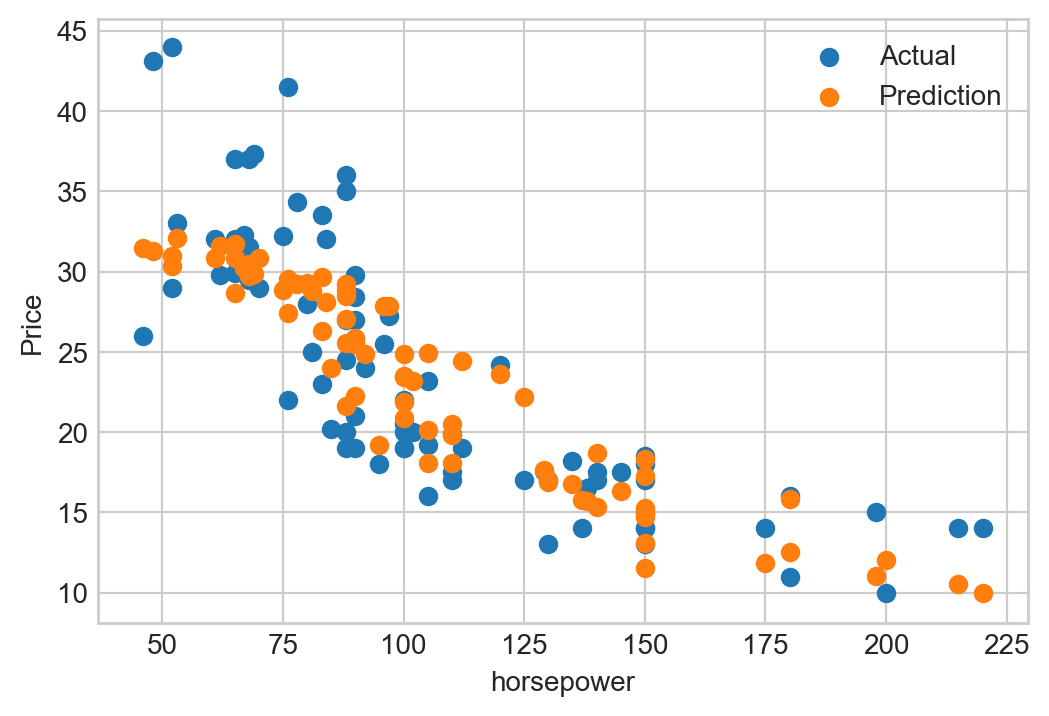

    weight Corr Coeff: -0.83 


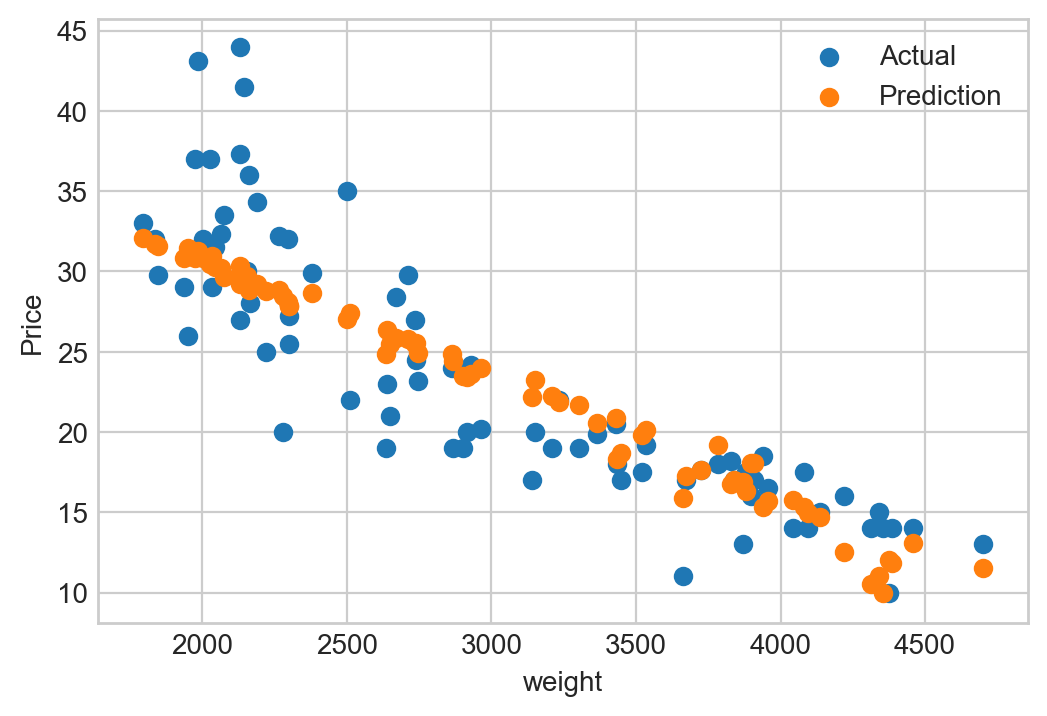

displacement Corr Coeff: -0.80 


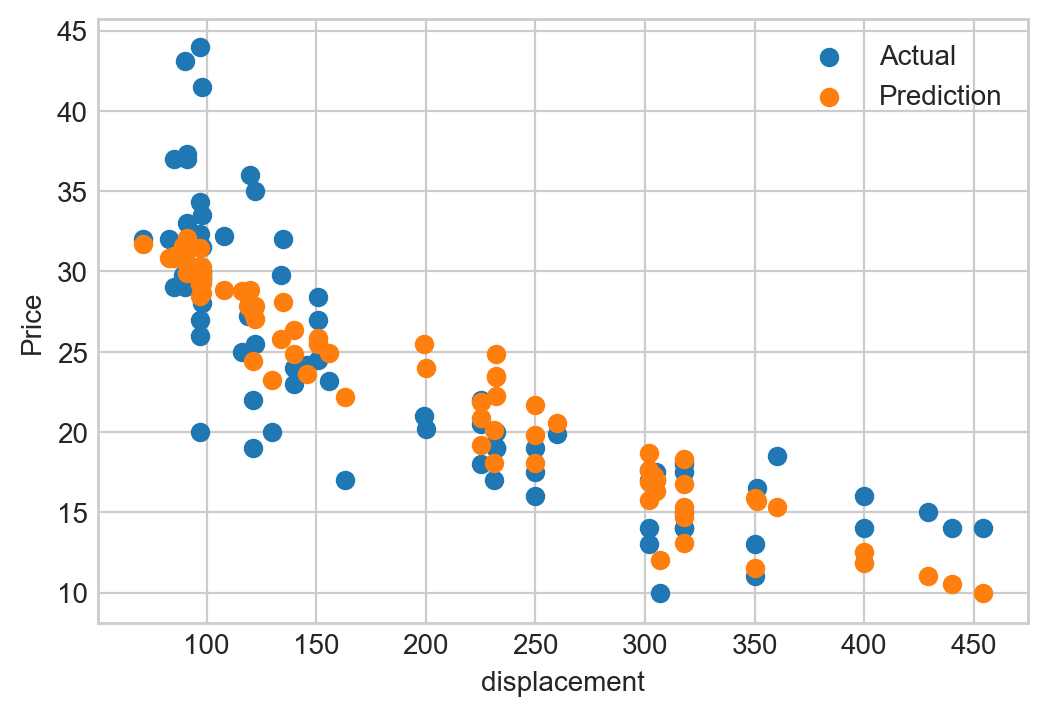

In [126]:
for col in features.columns:
    print(f"{col:>10} Corr Coeff: {np.corrcoef(features[col], target)[0][1]:>5.2f} ")
    plt.figure(dpi=200)
    plt.scatter(X_test[col], y_test, label='Actual')
    plt.scatter(X_test[col], y_pred, label='Prediction')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.legend()
    plt.show()

### Last Step Model Depployment

In [127]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [128]:
type(model)

sklearn.linear_model._base.LinearRegression

# Saving our Model

In [135]:
import pickle

In [136]:
fp=open("mpg.pkl",'wb')

In [137]:
pickle.dump(model,fp)

In [138]:
fp.close()

In [139]:
fp


<_io.BufferedWriter name='mpg.pkl'>